In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Logbook esperineza MuLife

## Determinazione Punti di Lavoro PMT

### 15 Febbraio: 
Dimensioni scintillatori: 
- lastre di scintillatori (quelli del telescopio e qullo finale): 49.9 x 27.1 cm^2
- blocco di scintillatore, tutto intero: 29.3 x 30.5 cm^2 (il lato di 30.5 cm è stato misurato molto ad occhio, vista la presenza di altri oggetti)

Determinazione dei punti di lavoro:
Per ciascun PMT misuriamo l'efficienza al variare, prima della sua tensione di alimentazione e poi della tensione di soglia del disciminatore. I punti di lavoro dei PMT usati come riferimento li impostiamo in maniera tale da visualizzare il segnale su entrambi ed essere il più efficienti possibili, cioè impostiamo una tensione di alimentazione alta, entro i limiti prestabiliti e come tensione di soglia ?. Decidiamo di determinare il punto di lavoro ottimale di ciascun pmt (alimentazione e soglia) dalla curva di efficienza (guardando il valore a cui abbiamo il ginocchio-punto di flesso) e non la curva dei conteggi in singola, poichè i pmt usati sono molto rumorosi, perciò servono almeno delle coincidenze doppie, meglio triple, per essere sicuri di acquisire segnali buoni.

PMT7:
- V_alim = 1719.95 V
- V_thr = - 0.406 V
- tau = 50 ns 

PMT5:
- V_alim = 1699.99 V
- V_thr = -0.397 V
- tau \simeq 55 ns
Vediamo che, rispetto al PMT7, il PMT5 è più rumoroso.

PMT4:
- V_alim = 1720.04 V
- V_thr = -0.417 V
- tau $\simeq$ 50 ns
PMT4 è meno rumoroso del 5

PMT3: per gli stessi punti di lavoro del PMT4 il 3 appare più rumoroso, perciò non lo useremo.

PMT2:
- V_alim = 1720.09 V
- V_thr = -0.402 V
- tau $\simeq$ 50 ns

PMT1:
- V_alim = 1720.06 V
- V_thr = -0.409 V
- tau $\simeq$ 50 ns

CURVA DELL'EFFICIENZA PMT7:
manteniamo i punti di lavoro definiti sopra per il PMT4 e PMT2 e variamo invece l'alimentazione del PMT7.

## Efficienza PMTs

## PMT per segnale di start (7,4,2)

In [3]:
df_eff2 = pd.read_csv("./Dati/Punto_di_lavor/PMT7.txt",sep="\t")

In [4]:
df_eff2['doppie_acc']=df_eff2['PMT4']*df_eff2['PMT2']*98*10**(-11)
df_eff2['err7']=np.sqrt(df_eff2['PMT7'])
df_eff2['err5']=np.sqrt(df_eff2['PMT4'])
df_eff2['err2']=np.sqrt(df_eff2['PMT2'])

In [5]:
df_eff2['efficienza']=df_eff2['7&4&2']/(df_eff2['4&2']-df_eff2['doppie_acc'])
df_eff2['err_V']=(df_eff2['Alimentazione PMT7 [V]']*0.0005+1)
df_eff2['err_eff']=np.sqrt(df_eff2['efficienza']*(1-df_eff2['efficienza'])/(df_eff2['4&2']-df_eff2['doppie_acc']))
df_eff2['err_tri']=np.sqrt(df_eff2['efficienza']*(1-df_eff2['efficienza'])*(df_eff2['4&2']-df_eff2['doppie_acc']))

In [6]:
df_eff2

,Alimentazione PMT7 [V],PMT7,PMT4,PMT2,4&2,7&4&2,doppie_acc,err7,err5,err2,efficienza,err_V,err_eff,err_tri
0,1600.04,63,188513,2904,483,5,0.536493,7.937254,434.180838,53.888774,0.010363,1.800020,0.004611,2.224451
1,1649.95,356,176131,2790,509,25,0.481577,18.867962,419.679640,52.820451,0.049162,1.824975,0.009588,4.875545
2,1699.03,1102,187767,2858,547,94,0.525905,33.196385,433.320897,53.460266,0.172012,1.849515,0.016144,8.822182
3,1720.04,1659,184573,2761,516,115,0.499414,40.730824,429.619599,52.545219,0.223084,1.860020,0.018336,9.452266
4,1739.98,2925,177662,2690,495,129,0.468353,54.083269,421.499703,51.865210,0.260853,1.869990,0.019745,9.764731
5,1750.01,4072,186664,2797,479,170,0.511657,63.812225,432.046294,52.886671,0.355286,1.875005,0.021879,10.469071
6,1760.09,6179,191919,2572,496,191,0.483743,78.606615,438.085608,50.714889,0.385457,1.880045,0.021864,10.834103
7,1780.01,12725,197144,2752,495,192,0.531689,112.805142,444.009009,52.459508,0.388296,1.890005,0.021917,10.837306
8,1800.06,22608,184989,2810,474,188,0.509423,150.359569,430.103476,53.009433,0.397051,1.900030,0.022486,10.646801


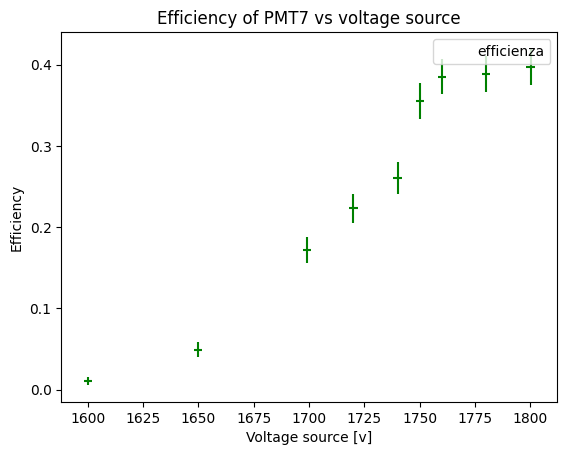

In [7]:
fig_4=df_eff2.plot(x='Alimentazione PMT7 [V]',y='efficienza',
             title='Efficiency of PMT7 vs voltage source', 
             xlabel='Voltage source [v]',ylabel='Efficiency',xerr='err_V',yerr='err_eff',style='.',color='green',linestyle='None'
                ).get_figure()

In [48]:
fig_4.savefig('./Plots/Punti di lavoro/eff_7.pdf')

Dalla curva dell'efficienza del PMT7 decidiamo di utilizzare 1740 V come tensione di alimentazione. 
Procediamo analogamente con il PMT4. 


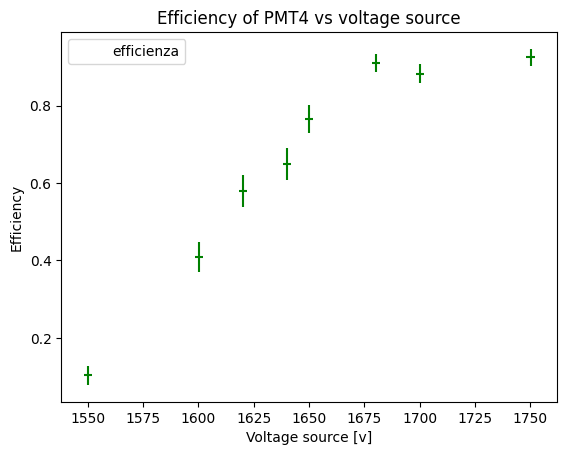

In [2]:
df_eff3 = pd.read_csv("./Dati/Punto_di_lavor/PMT4.txt",sep="\t")
df_eff3['doppie_acc']=df_eff3['PMT7']*df_eff3['PMT2']*98*10**(-11)
df_eff3['err1']=np.sqrt(df_eff3['PMT7'])
df_eff3['err2']=np.sqrt(df_eff3['PMT4'])
df_eff3['err3']=np.sqrt(df_eff3['PMT2'])
df_eff3['efficienza']=df_eff3['7&4&2']/(df_eff3['7&2']-df_eff3['doppie_acc'])
df_eff3['err_V']=(df_eff3['Alimentazione PMT4 [V]']*0.0005+1)
df_eff3['err_eff']=np.sqrt(df_eff3['efficienza']*(1-df_eff3['efficienza'])/(df_eff3['7&2']-df_eff3['doppie_acc']))
df_eff3['err_tri']=np.sqrt(df_eff3['efficienza']*(1-df_eff3['efficienza'])*(df_eff3['7&2']-df_eff3['doppie_acc']))
fig_4=df_eff3.plot(x='Alimentazione PMT4 [V]',y='efficienza',
             title='Efficiency of PMT4 vs voltage source', 
             xlabel='Voltage source [v]',ylabel='Efficiency',xerr='err_V',yerr='err_eff',style='.',color='green',linestyle='None'
                ).get_figure()

In [9]:
df_eff3

,Alimentazione PMT4 [V],PMT7,PMT4,PMT2,7&2,7&4&2,doppie_acc,err1,err2,err3,efficienza,err_V,err_eff,err_tri
0,1550.04,2788,248,2718,155,16,0.007426,52.801515,15.748016,52.134442,0.103231,1.775020,0.024439,3.787916
1,1600.12,2720,1216,2685,159,65,0.007157,52.153619,34.871192,51.816986,0.408823,1.800060,0.038989,6.198909
2,1620.02,2848,5062,2680,143,83,0.007480,53.366656,71.147734,51.768716,0.580450,1.810010,0.041268,5.901072
3,1640.11,2771,18101,2708,134,87,0.007354,52.640289,134.539957,52.038447,0.649289,1.820055,0.041224,5.523751
4,1680.18,2794,76977,2664,145,132,0.007294,52.858301,277.447292,51.613952,0.910391,1.840090,0.023720,3.439250
5,1650.06,2838,27997,2692,137,105,0.007487,53.272882,167.323041,51.884487,0.766465,1.825030,0.036147,4.951883
6,1700.09,2800,111064,2730,178,157,0.007491,52.915026,333.262659,52.249402,0.882060,1.850045,0.024176,4.303097
7,1750.19,2743,1198536,2703,145,134,0.007266,52.373658,1094.776690,51.990384,0.924184,1.875095,0.021983,3.187367


In [49]:
fig_4.savefig('./Plots/Punti di lavoro/eff_4.pdf')

Dalla curva sull'efficienza del PMT4 decidiamo di impostare come alimentazione 1650 V. Ripetiamo per il PMT2, usando PMT7 e PMT4 come riferimento.

In [10]:
df_eff1 = pd.read_csv("./Dati/Punto_di_lavor/PMT2.txt",sep="\t")

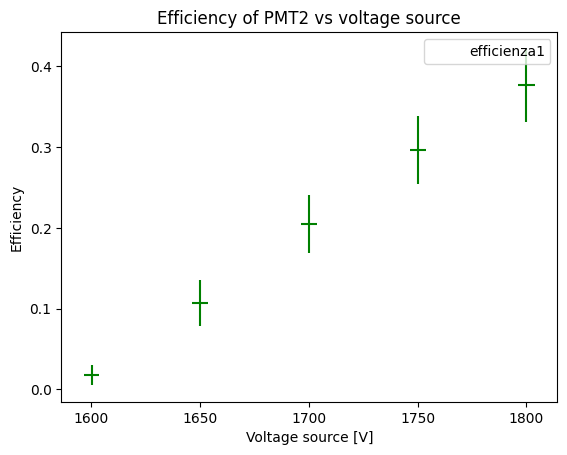

In [14]:
df_eff1 = pd.read_csv("./Dati/Punto_di_lavor/PMT2.txt",sep="\t")
df_eff1['doppie_acc']=df_eff1['PMT7']*df_eff1['PMT4']*98*10**(-11)
df_eff1['err1']=np.sqrt(df_eff1['PMT7'])
df_eff1['err2']=np.sqrt(df_eff1['PMT4'])
df_eff1['err3']=np.sqrt(df_eff1['PMT2'])
df_eff1['efficienza1']=df_eff1['7&4&2']/(df_eff1['7&4']-df_eff1['doppie_acc'])
df_eff1['err_V']=(df_eff1['Alimentazione PMT2 [V]']*0.0005+1)*2
df_eff1['err_eff1']=np.sqrt(df_eff1['efficienza1']*(1-df_eff1['efficienza1'])/df_eff1['7&4'])*2
fig_4=df_eff1.plot(x='Alimentazione PMT2 [V]',y='efficienza1',
             title='Efficiency of PMT2 vs voltage source', 
             xlabel='Voltage source [V]',ylabel='Efficiency',xerr='err_V',yerr='err_eff1',style='.',color='green',linestyle='None'
                ).get_figure()
fig_4.savefig('./Plots/Punti di lavoro/eff_2.pdf')

In [15]:
df_eff1

,Alimentazione PMT2 [V],PMT7,PMT4,PMT2,7&4,7&4&2,doppie_acc,err1,err2,err3,efficienza1,err_V,err_eff1
0,1600.15,2634,28677,340,449,8,0.074025,51.322510,169.342848,18.439089,0.017820,3.60015,0.012487
1,1650.06,2601,26152,957,478,51,0.066661,51.000000,161.715800,30.935417,0.106709,3.65006,0.028243
2,1700.04,2752,28797,2039,498,102,0.077664,52.459508,169.696788,45.155288,0.204851,3.70004,0.036171
3,1750.07,2703,28971,3981,476,141,0.076742,51.990384,170.208695,63.095166,0.296266,3.75007,0.041857
4,1800.01,2611,26711,7069,462,174,0.068348,51.097945,163.435002,84.077345,0.376679,3.80001,0.045087


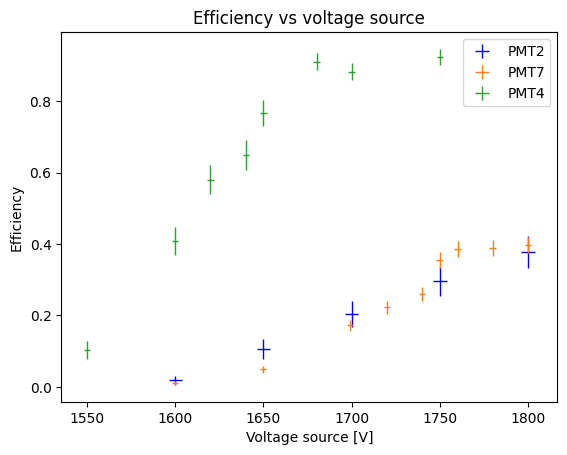

In [16]:
fig = plt.figure()

plt.errorbar(df_eff1['Alimentazione PMT2 [V]'],df_eff1['efficienza1'],
             xerr=df_eff1['err_V'],yerr=df_eff1['err_eff1'],label='PMT2',linestyle='None',elinewidth=1,
             ecolor='blue')

plt.errorbar(df_eff2['Alimentazione PMT7 [V]'],df_eff2['efficienza'],
             xerr=df_eff2['err_V'],yerr=df_eff2['err_eff'],label='PMT7',linestyle='None',elinewidth=1,
             ecolor='#ff7f0e')

plt.errorbar(df_eff3['Alimentazione PMT4 [V]'],df_eff3['efficienza'],

             xerr=df_eff3['err_V'],yerr=df_eff3['err_eff'],label='PMT4',linestyle='None',elinewidth=1,
             ecolor='#2ca02c')

#fig.text(0.65, 0.37, "Errorbars multiplied by 2", fontsize=10, 
         #ha='center',bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10})

plt.xlabel('Voltage source [V]')
plt.ylabel('Efficiency')
plt.title('Efficiency vs voltage source')
plt.legend()
plt.savefig('./Plots/Punti di lavoro/eff.pdf')
plt.show()

Impostiamo quindi V_alim del PMT2 a 1750 V.

### 21 febbraio 2023
Cambiamo le tensioni di alimentazione in modo da prendere il valore dell'alimentazione per cui l'efficienza raggiunge il massimo:
- V_7 = 1760 V
- V_4 = 1690 V
- V_2 = 1780 V
- V_1 = 1700 V

Impostiamo V_thr,1 = - 24.6 mV, che è la minima impostabile al discriminatore. Mi serve minima per prendere qualsiasi segnale di veto. DOBBIAMO POI STIMARE IL RATE DI FAKE VETO.Quando calcolo l'efficienza di quelli esterni devo correggere per l'accettanza per avere una stima dell'efficienza reale. Quella che stimo è minore per via dell'accettanza.

## PMT per decadimento (8,9,10,11)

Osserviamo i segnali del PMT8. Impostiamo un'alimentazione di 1126 V e una soglia del discriminatore di - 173.4 mV.



### 16 febbraio 2023

Per il PMT9 impostiamo:\
- V_alim = 1126 V
- V_thr = -183.0 mV

Per il PMT10 impostiamo:\
- V_alim = 1206 V
- V_thr = - 179.0 mV

Per il PMT11 impostiamo:\
- V_alim = 1213 V
- V_thr = - 184.0 mV

### Efficienza PMT bersaglio

Per ciascuno scintillatore del bersaglio utilizziamo il PMT2 e PMT1 come riferimento e poi realizziamo la curva dell'efficienza al variare dell'alimentazione di ciascun PMT.

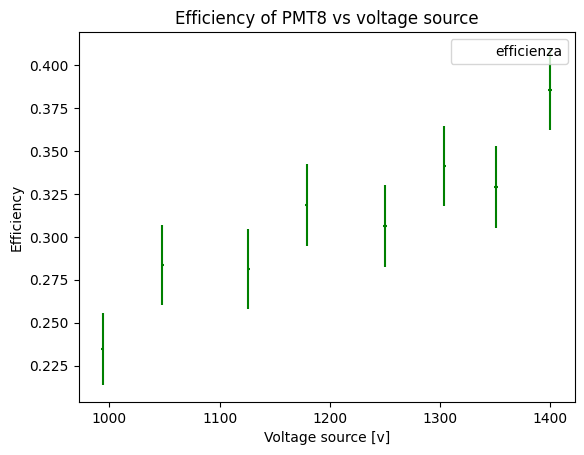

In [9]:
df_eff8 = pd.read_csv("./Dati/Punto_di_lavor/PMT8.txt",sep=";")

df_eff8['efficienza']=df_eff8['2&8&1']/(df_eff8['2&1'])
df_eff8['err_V']=(df_eff8['V_8']*0.0005+1)
df_eff8['err_eff']=np.sqrt(df_eff8['efficienza']*(1-df_eff8['efficienza'])/(df_eff8['2&1']))
df_eff8['err_tri']=np.sqrt(df_eff8['efficienza']*(1-df_eff8['efficienza'])*(df_eff8['2&1']))
fig_8=df_eff8.plot(x='V_8',y='efficienza',
             title='Efficiency of PMT8 vs voltage source', 
             xlabel='Voltage source [v]',ylabel='Efficiency',xerr='err_V',yerr='err_eff',style='.',color='green',linestyle='None'
                ).get_figure()

fig_8.savefig('./Plots/Punti di lavoro/eff_8.pdf')


Dalla curva decidiamo di alimentare PMT8 a 1200 V. Ripetiamo per il PMT9. D'ora in poi acquisiamo per 30 s.

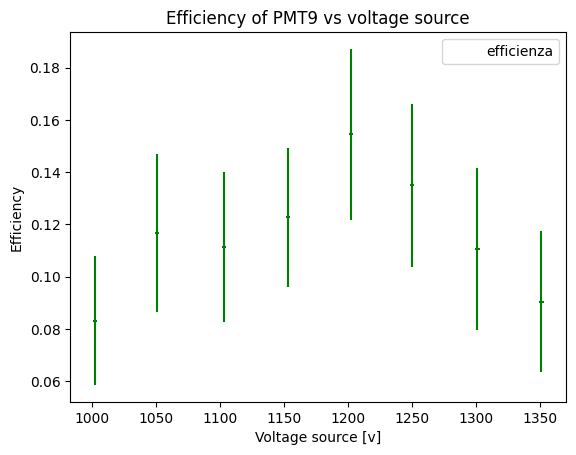

In [12]:
df_eff9 = pd.read_csv("./Dati/Punto_di_lavor/PMT9.txt",sep=";")

df_eff9['efficienza']=df_eff9['2&9&1']/(df_eff8['2&1'])
df_eff9['err_V']=(df_eff9['V_9']*0.0005+1)
df_eff9['err_eff']=np.sqrt(df_eff9['efficienza']*(1-df_eff9['efficienza'])/(df_eff9['2&1']))
df_eff9['err_tri']=np.sqrt(df_eff9['efficienza']*(1-df_eff9['efficienza'])*(df_eff9['2&1']))
fig_9=df_eff9.plot(x='V_9',y='efficienza',
             title='Efficiency of PMT9 vs voltage source', 
             xlabel='Voltage source [v]',ylabel='Efficiency',xerr='err_V',yerr='err_eff',style='.',color='green',linestyle='None'
                ).get_figure()

fig_9.savefig('./Plots/Punti di lavoro/eff_9.pdf')

Per il PMT9: alimentazione di 1150 V. Perchè la curva dell'efficienza viene così? Dobbiamo esplorare regioni più ampie di alimentazione?

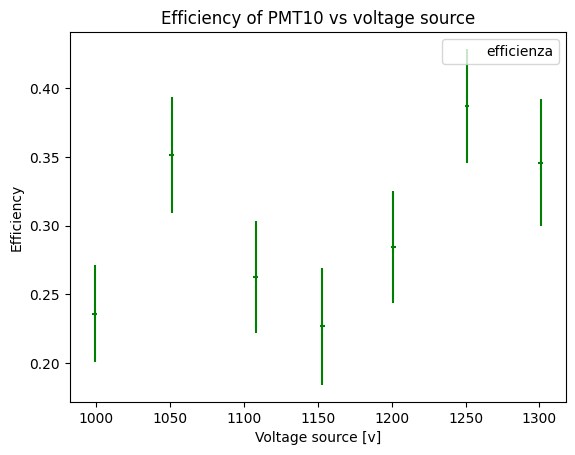

In [25]:
df_eff10 = pd.read_csv("./Dati/Punto_di_lavor/PMT10.txt",sep=";")

df_eff10['efficienza']=df_eff10['2&10&1']/(df_eff10['2&1'])
df_eff10['err_V']=(df_eff10['V_10']*0.0005+1)
df_eff10['err_eff']=np.sqrt(df_eff10['efficienza']*(1-df_eff10['efficienza'])/(df_eff10['2&1']))
df_eff10['err_tri']=np.sqrt(df_eff10['efficienza']*(1-df_eff10['efficienza'])*(df_eff10['2&1']))
fig_10=df_eff10.plot(x='V_10',y='efficienza',
             title='Efficiency of PMT10 vs voltage source', 
             xlabel='Voltage source [v]',ylabel='Efficiency',xerr='err_V',yerr='err_eff',style='.',color='green',linestyle='None'
                ).get_figure()

fig_10.savefig('./Plots/Punti di lavoro/eff_10.pdf')

In [24]:
df_eff10 = pd.read_csv("./Dati/Punto_di_lavor/PMT10.txt",sep=";",index_col=None)
df_eff10

,V_10,2&10&1,2&1
0,999,34,144
1,1051,45,128
2,1108,31,118
3,1153,22,97
4,1201,35,123
5,1251,53,137
6,1301,37,107


Le curve di efficienza non ci convincono. Abbassiamo le soglie di tutti e quattro a -75 mV. Salviamo in *PMTXbis.txt*.


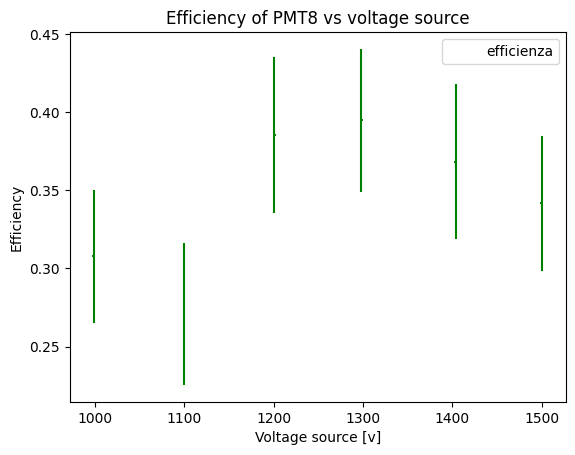

In [29]:
df_eff8 = pd.read_csv("./Dati/Punto_di_lavor/PMT8bis.txt",sep=";")

df_eff8['efficienza']=df_eff8['2&8&1']/(df_eff8['2&1'])
df_eff8['err_V']=(df_eff8['V_8']*0.0005+1)
df_eff8['err_eff']=np.sqrt(df_eff8['efficienza']*(1-df_eff8['efficienza'])/(df_eff8['2&1']))
df_eff8['err_tri']=np.sqrt(df_eff8['efficienza']*(1-df_eff8['efficienza'])*(df_eff8['2&1']))
fig_8=df_eff8.plot(x='V_8',y='efficienza',
             title='Efficiency of PMT8 vs voltage source', 
             xlabel='Voltage source [v]',ylabel='Efficiency',xerr='err_V',yerr='err_eff',style='.',color='green',linestyle='None'
                ).get_figure()

fig_8.savefig('./Plots/Punti di lavoro/eff_8.pdf')


Torniamo ad acquisire per 100 s e acquisiamo anche le singole di ciascun PMT. Le tensioni di soglia sono quelle impostate prima (-75 mV). Salviamo in *PMT8tris.txt* i dati del PMT8

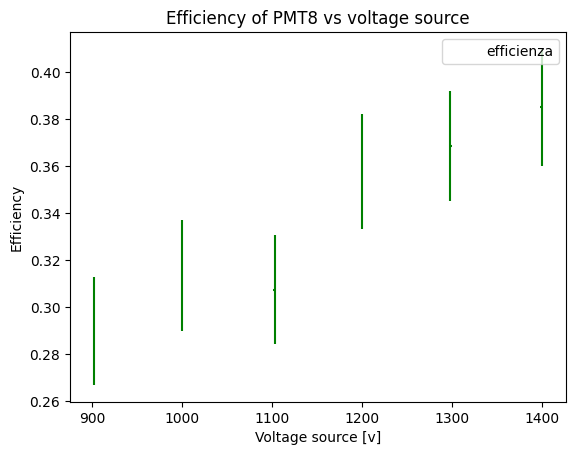

In [35]:
df_eff8t = pd.read_csv("./Dati/Punto_di_lavor/PMT8tris.txt",sep=";")
df_eff8t['doppie_acc']=df_eff8t['PMT2']*df_eff8t['PMT1']*98*10**(-11)
df_eff8t['err1']=np.sqrt(df_eff8t['PMT2'])
df_eff8t['err2']=np.sqrt(df_eff8t['PMT8'])
df_eff8t['err3']=np.sqrt(df_eff8t['PMT1'])
df_eff8t['efficienza']=df_eff8t['2&8&1']/(df_eff8t['2&1']-df_eff8t['doppie_acc'])
df_eff8t['err_V']=(df_eff8t['Alimentazione PMT8 [V]']*0.0005+1)
df_eff8t['err_eff']=np.sqrt(df_eff8t['efficienza']*(1-df_eff8t['efficienza'])/(df_eff8t['2&1']-df_eff8t['doppie_acc']))
df_eff8t['err_tri']=np.sqrt(df_eff8t['efficienza']*(1-df_eff8t['efficienza'])*(df_eff8t['2&1']-df_eff8t['doppie_acc']))
fig_8t=df_eff8t.plot(x='Alimentazione PMT8 [V]',y='efficienza',
             title='Efficiency of PMT8 vs voltage source', 
             xlabel='Voltage source [v]',ylabel='Efficiency',xerr='err_V',yerr='err_eff',style='.',color='green',linestyle='None'
                ).get_figure()

fig_8t.savefig('./Plots/Punti di lavoro/eff_8tris.pdf')

In [34]:
df_eff8t = pd.read_csv("./Dati/Punto_di_lavor/PMT8tris.txt",sep=";")
df_eff8t

,Alimentazione PMT8 [V],PMT2,PMT8,PMT1,2&1,2&8&1
0,902,3908,819,17266,390,113
1,1000,3794,955,17248,386,121
2,1103,3710,1371,17192,397,122
3,1200,3822,5590,17283,383,137
4,1298,3923,15989,17133,418,154
5,1400,3822,29700,17080,382,147


Alimentiamo il PMT8  V_alim= 1168 V.\
Procediamo analogamente con il PMT9,10,11 e salviamo in *PMTbersaglio.txt*


In [39]:
df_efft = pd.read_csv("./Dati/Punto_di_lavor/PMTbersaglio.txt",sep=";")
df_efft

,Alimentazione [V],2&9&1,2&10&1,2&11&1,2&1
0,900,137.0,119.0,188.0,447.0
1,1000,154.0,115.0,173.0,385.0
2,1100,175.0,143.0,204.0,431.0
3,1200,NaN,NaN,NaN,NaN


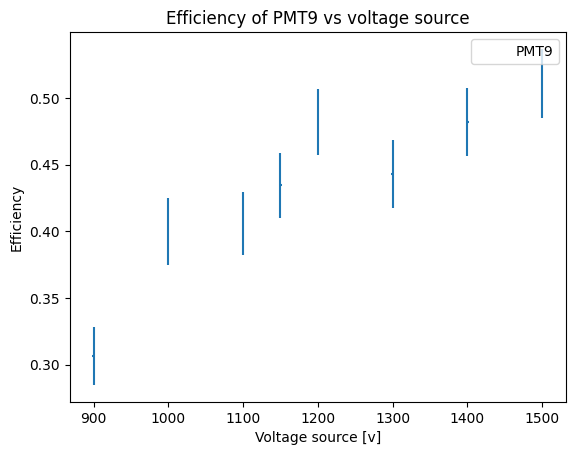

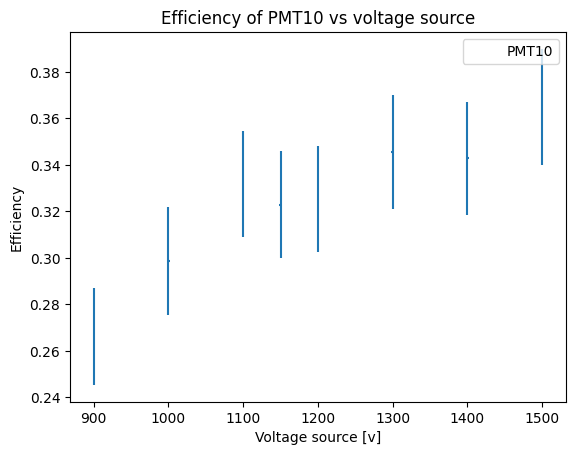

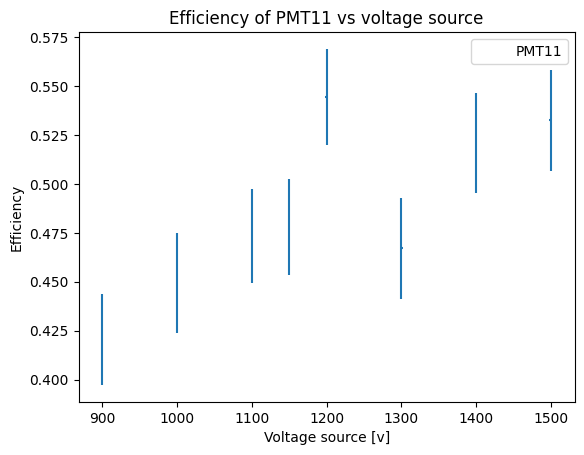

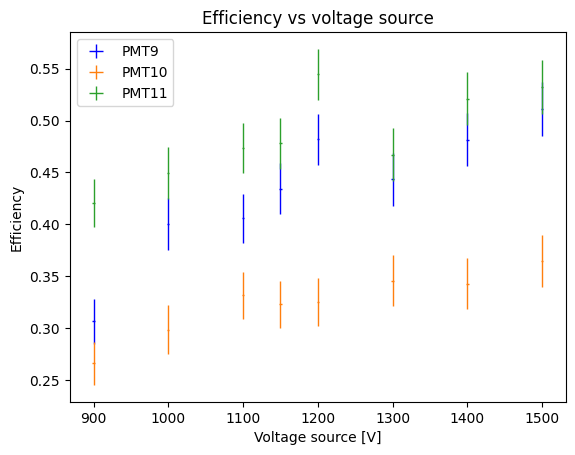

In [3]:
df_efft = pd.read_csv("./Dati/Punto_di_lavor/PMTbersaglio.txt",sep=";")

df_efft['efficienza9']=df_efft['2&9&1']/(df_efft['2&1'])
df_efft['efficienza10']=df_efft['2&10&1']/(df_efft['2&1'])
df_efft['efficienza11']=df_efft['2&11&1']/(df_efft['2&1'])
df_efft['err_V']=(df_efft['Alimentazione [V]']*0.0005+1)
df_efft['err_eff9']=np.sqrt(df_efft['efficienza9']*(1-df_efft['efficienza9'])/(df_efft['2&1']))
df_efft['err_eff10']=np.sqrt(df_efft['efficienza10']*(1-df_efft['efficienza10'])/(df_efft['2&1']))
df_efft['err_eff11']=np.sqrt(df_efft['efficienza11']*(1-df_efft['efficienza11'])/(df_efft['2&1']))
df_efft['err_tri9']=np.sqrt(df_efft['efficienza9']*(1-df_efft['efficienza9'])*(df_efft['2&1']))
fig_9=df_efft.plot(x='Alimentazione [V]',y='efficienza9',
             title='Efficiency of PMT9 vs voltage source', 
             xlabel='Voltage source [v]',ylabel='Efficiency',xerr='err_V',
                   yerr='err_eff9',style='.',label='PMT9',linestyle='None'
                ).get_figure()

fig_10=df_efft.plot(x='Alimentazione [V]',y='efficienza10',
             title='Efficiency of PMT10 vs voltage source', 
             xlabel='Voltage source [v]',ylabel='Efficiency',xerr='err_V',
                    yerr='err_eff10',style='.',label='PMT10',linestyle='None'
                ).get_figure()

fig_11=df_efft.plot(x='Alimentazione [V]',y='efficienza11',
             title='Efficiency of PMT11 vs voltage source', 
             xlabel='Voltage source [v]',ylabel='Efficiency',xerr='err_V',
                    yerr='err_eff11',style='.',label='PMT11',linestyle='None'
                ).get_figure()

fig_9.savefig('./Plots/Punti di lavoro/eff9.pdf')

fig1 = plt.figure()

plt.errorbar(df_efft['Alimentazione [V]'],df_efft['efficienza9'],
             xerr=df_efft['err_V'],yerr=df_efft['err_eff9'],label='PMT9',linestyle='None',elinewidth=1,
             ecolor='blue')

plt.errorbar(df_efft['Alimentazione [V]'],df_efft['efficienza10'],
             xerr=df_efft['err_V'],yerr=df_efft['err_eff10'],label='PMT10',linestyle='None',elinewidth=1,
             ecolor='#ff7f0e')

plt.errorbar(df_efft['Alimentazione [V]'],df_efft['efficienza11'],

             xerr=df_efft['err_V'],yerr=df_efft['err_eff11'],label='PMT11',linestyle='None',elinewidth=1,
             ecolor='#2ca02c')

#fig.text(0.65, 0.37, "Errorbars multiplied by 2", fontsize=10, 
         #ha='center',bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10})

plt.xlabel('Voltage source [V]')
plt.ylabel('Efficiency')
plt.title('Efficiency vs voltage source')
plt.legend()
plt.savefig('./Plots/Punti di lavoro/eff_bersaglio.pdf')
plt.show()

In [4]:
df_efft

,Alimentazione [V],2&9&1,2&10&1,2&11&1,2&1,efficienza9,efficienza10,efficienza11,err_V,err_eff9,err_eff10,err_eff11,err_tri9
0,900,137,119,188,447,0.306488,0.266219,0.420582,1.450,0.021806,0.020905,0.023349,9.747368
1,1000,154,115,173,385,0.400000,0.298701,0.449351,1.500,0.024968,0.023326,0.025351,9.612492
2,1100,175,143,204,431,0.406032,0.331787,0.473318,1.550,0.023655,0.022680,0.024050,10.195309
3,1150,179,133,197,412,0.434466,0.322816,0.478155,1.575,0.024421,0.023035,0.024610,10.061341
4,1200,200,135,226,415,0.481928,0.325301,0.544578,1.600,0.024528,0.022997,0.024446,10.179119
5,1300,168,131,177,379,0.443272,0.345646,0.467018,1.650,0.025517,0.024429,0.025627,9.671109
6,1400,184,131,199,382,0.481675,0.342932,0.520942,1.700,0.025565,0.024287,0.025560,9.765845
7,1500,189,135,197,370,0.510811,0.364865,0.532432,1.750,0.025988,0.025026,0.025939,9.615444


Impostiamo le seguenti alimentazioni:
- PMT9: 1150V
- PMT10: 1100 V
- PMT11: 1150 V

### 21 febbraio 2023
Cambiamo le alimentazioniin modo da avere efficienza massima. Se in seguito ci rendiamo conto che non vanno bene dobbiamo confrontare la curva dell'efficienza con l'andamento del fondo.
- V_8 = 1300 V
- V_9 = 1200 V
- V_10 = 1300 V
- V_11 = 1200 V



## Efficienza dell'OR dei 4 blocchetti
Alle tensioni di alimentazione dei 4 PMT sopra riportate stimiamo l'efficienza dell'OR dei 4 blocchetti.
Troviamo:
- #2 = 5850
- #OR = 49270
- #1 = 142559
- #2&1 = 448
- #2&OR&1 = 354

In 100 s. Questo porta ad un'effienza dell'OR, per le tensioni usate per ciascun blocchetto, del 80% circa. Per fare qualcosa di più preciso dovremmo costruire la curva dell'efficienza dell'OR variando separatamente l'alimentazione di ciascun PMT del bersaglio, ma per il momento teniamo tutto così.

## Segnale di Start e Stop

### 16 febbraio 2023

Con il segnale di start realizzato "al volo" abbiamo circa 0.6 Hz di segnale.
Rivedere soglia del PMT1.

### 21 febbraio 2023

Con le alimentazioni cambiate oggi abbiamo, in 100 s 64 conteggi dall'AND di (7,4,2,OR,1 negato). Facciamo uan foto dei segnali di start e stop all'oscilloscopio (teelfono di Ale), in cui si osservano dei segnali di stop (azzurro) dopo 2 micorsecondi. 

### Segnale di veto

Utilizzando il modulo Quad Gate Generator generiamo un segnale di gate ritardato di circa 75 ns rispetto al segnale di STOP. Questo serve perchè l'OR fa parte sia del segnale di stop, sia di quello di start, in cui però viene messo in coincidenza con altri segnali e la coincidenza introduce un certo ritardo, oltre anche ai cavi. Perciò serve che il segnale di stop sia "ritardato" di decine di ns. In 100 secondi abbiamo: 95 conteggi di start, 48860 di stop.

### Cose da valutare in seguito per migliorare la misura:
- SEGNALE DELLE COINCIDENZE: è importante che il segnale di veto del PMT1 sia più lungo della coincidenza di 7,4,2 e OR, poichè nelle regioni in cui l'1 negato è basso e la coincidenza degli altri è alta io acquisisco e non dovrei?\ 
- SEGNALE DI GATE: per diminuire il rate degli stop e acquisire solo gli stop che seguono uno start devo allungare il segnale di start fino a circa 10 volte la vita media del mu e metterlo in coinidenza con il segnale di stop, così saremo sicuri di prendere solo gli stop che seguono uno start e quindi il rate degli stop ci aspettiamo coinida o quasi con quello degli start.

## Acquisizione segnali con FPGA

Per familiarizzare con l'FPGA le inviamo un segnale TTL così generato: prendo l'impulso generato dal Dual Timer, mando l'end marker di uno allo start dell'altro (tipo flip-flop). Otteniamo un segnale di 2.8 Hz. Salviamo i dati in *prova16feb23.dat*.
Ritardiamo il segnale TTL sempre di 75 ns (come fatto anche prima).\ Generiamo uns egnale di gate della lunghezza di 30 us (circa 10 vite medie del muone) a partire dal segnale di start, che poi mandiamo in coinicenza con il segnale di stop, in modo da avere uno stop (o qualcehs top) per ogni start e ridurre così drasticamente i rate di stop.\ In 100 secondi misuriamo 69 conteggi di start e 72 di stop.\ Iniziamo ad acquisire vediamo che il segnale di stop è sempre dopo circa 80 ns da quello di start. Ma allora si tratta sempre dello start? Vogliamo modificare il segnale di gate in modo che parta 80 ns dopo il segnale di start e duri poi sempre 30 us.

Rivedere accettanza geoemtrica (angolo solido) per la stima del rate dello start: devo considerare anche il PMT1 per la stima dell'angolo solido perchè anche quello fa aprte dello start.

## Prima Acquisizione dati per MuLife

## Errori Sistematici

## Alterazione vita media del muone negativo dalla interazione con il materiale scintillatore

## Spettro in energia dell'elettrone di decadimento

### Calibrazione del modulo di amplificazione di carica

### Altro...

In [303]:
df_eff2_print=df_eff2.copy()

In [304]:
df_eff2_print["V"] = df_eff2["V"].astype(str) + '±' + df_eff2["err_V"].round(0).astype(int).astype(str)
df_eff2_print['1']=df_eff2["1"].astype(str) + '±' + df_eff2["err1"].round(0).astype(int).astype(str)
df_eff2_print['2']=df_eff2["2"].astype(str) + '±' + df_eff2["err2"].round(0).astype(int).astype(str)
df_eff2_print['3']=df_eff2["3"].astype(str) + '±' + df_eff2["err3"].round(0).astype(int).astype(str)
df_eff2_print['efficienza']=df_eff2["efficienza"].round(3).astype(str) + '±' + df_eff2["err_eff"].round(3).astype(str)
df_eff2_print['doppie_acc']=df_eff2_print['doppie_acc'].round(2)
df_eff2_print['1&2&3']=df_eff2["1&2&3"].astype(str) + '±' + df_eff2["err_tri"].round(0).astype(int).astype(str)

In [305]:
df_eff2_print.drop(['err1','err2','err3','err_V','err_eff','err_tri'],axis=1,inplace=True)
print(df_eff2_print.to_latex(index=False))

\begin{tabular}{llllrlrl}
\toprule
     V &          1 &          2 &          3 &  1\&3 &   1\&2\&3 &  doppie\_acc &  efficienza \\
\midrule
1500±2 & 117786±343 &       43±7 & 124865±353 & 1787 &    14±4 &       14.41 & 0.008±0.002 \\
1525±2 & 118337±344 &     116±11 & 127691±357 & 1861 &    28±5 &       14.81 & 0.015±0.003 \\
1550±2 & 114947±339 &     300±17 & 125546±354 & 1828 &    80±9 &       14.14 & 0.044±0.005 \\
1575±2 & 128549±359 &     757±28 & 129436±360 & 1827 &  249±15 &       16.31 & 0.138±0.008 \\
1600±2 & 127551±357 &    1751±42 & 131284±362 & 1843 &  587±20 &       16.41 & 0.321±0.011 \\
1625±2 & 128204±358 &    3351±58 & 134213±366 & 1859 & 1119±21 &       16.86 & 0.607±0.011 \\
1650±2 & 128634±359 &    5329±73 & 131384±362 & 1890 & 1428±18 &       16.56 &  0.762±0.01 \\
1675±2 & 128860±359 &    7889±89 & 128064±358 & 1848 & 1571±15 &       16.17 & 0.858±0.008 \\
1700±2 & 128641±359 &  11111±105 & 129291±360 & 1875 & 1662±13 &       16.30 & 0.894±0.007 \\
1725±2 & 129

In [309]:
df_eff3_print=df_eff3.copy()
df_eff3_print["V"] = df_eff3["V"].astype(str) + '±' + df_eff3["err_V"].round(0).astype(int).astype(str)
df_eff3_print['1']=df_eff3["1"].astype(str) + '±' + df_eff3["err1"].round(0).astype(int).astype(str)
df_eff3_print['2']=df_eff3["2"].astype(str) + '±' + df_eff3["err2"].round(0).astype(int).astype(str)
df_eff3_print['3']=df_eff3["3"].astype(str) + '±' + df_eff3["err3"].round(0).astype(int).astype(str)
df_eff3_print['efficienza']=df_eff3["efficienza"].round(3).astype(str) + '±' + df_eff2["err_eff"].round(3).astype(str)
df_eff3_print['doppie_acc']=df_eff3_print['doppie_acc'].round(2)
df_eff3_print['1&2&3']=df_eff3["1&2&3"].astype(str) + '±' + df_eff3["err_tri"].round(0).astype(int).astype(str)
df_eff3_print.drop(['err1','err2','err3','err_V','err_eff','err_tri'],axis=1,inplace=True)
print(df_eff3_print.to_latex(index=False))

\begin{tabular}{llllrlrl}
\toprule
     V &          1 &          2 &            3 &  1\&2 &   1\&2\&3 &  doppie\_acc &  efficienza \\
\midrule
1500±2 & 107990±329 & 109758±331 &         87±9 & 2733 &    22±5 &       11.62 & 0.008±0.002 \\
1525±2 & 108912±330 & 109573±331 &       298±17 & 2791 &    83±9 &       11.70 &  0.03±0.003 \\
1550±2 & 108212±329 & 109628±331 &      1395±37 & 2747 &  257±15 &       11.63 & 0.094±0.005 \\
1560±2 & 107425±328 & 109808±331 &      2573±51 & 2743 &  440±19 &       11.56 & 0.161±0.008 \\
1575±2 & 107749±328 & 109709±331 &      4973±71 & 2779 &  662±22 &       11.58 & 0.239±0.011 \\
1585±2 & 107559±328 & 110563±333 &      6468±80 & 2842 &  819±24 &       11.65 & 0.289±0.011 \\
1595±2 & 107066±327 & 109347±331 &      9051±95 & 2792 & 1113±26 &       11.47 &    0.4±0.01 \\
1600±2 & 108045±329 & 110262±332 &    10339±102 & 2787 & 1167±26 &       11.67 &  0.42±0.008 \\
1625±2 & 107711±328 & 110826±333 &    16819±130 & 2841 & 1485±27 &       11.70 & 0.525±0

In [ ]:
df_eff1=pd.DataFrame({'1': [122607], '2': [111009],'3':[118695],'2&3':[2800],'1&2&3':[1733]})

In [ ]:
df_eff1['doppie_acc']=df_eff1['1']*df_eff1['2']*98*10**(-11)
df_eff1['err1']=np.sqrt(df_eff1['1'])
df_eff1['err2']=np.sqrt(df_eff1['2'])
df_eff1['err3']=np.sqrt(df_eff1['3'])
df_eff1['efficienza']=df_eff1['1&2&3']/(df_eff1['2&3']-df_eff1['doppie_acc'])
#df_eff1['err_V']=(df_eff1['V']*0.0005+1)
df_eff1['err_eff']=np.sqrt(df_eff1['efficienza']*(1-df_eff1['efficienza'])/(df_eff1['2&3']-df_eff1['doppie_acc']))
df_eff1['err_tri']=np.sqrt(df_eff1['efficienza']*(1-df_eff1['efficienza'])*(df_eff1['2&3']-df_eff1['doppie_acc']))

In [ ]:
df_eff1